<a href="https://colab.research.google.com/github/ktjayamanna/Face-Detection-Using-Open-CV-Haar-Cascade/blob/master/Webcam_Face_and_Eyes_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import scipy as sp
import urllib.request

In [35]:
# Eyes/ Face Detection
def DetectFacesEyes(image):
    #Save a copy that will be subjected to operations.
    TempCopy = image
    #Convert to grayscale
    Gray = cv2.cvtColor(TempCopy,cv2.COLOR_BGR2GRAY)
    # Initialize the Face Classifier
    detector = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
    # Initialize the Eyes Classifier
    EyeDetector = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')
    #Make a list of faces
    FaceList = detector.detectMultiScale(image)
    #Loop through the face list.
    for face in FaceList:
        #Obtain left top corner and the width and the height.
        (x,y,w,h) = face
        #Draw a Rectangle Around the face.
        cv2.rectangle(TempCopy,(x,y),(x+w,y+h),(0,255,0),4)
        
  #Detect Eyes
    #Get the ROI in Gray Image for Detection.
    ROIGray = Gray[y:y+h,x:x+w]
    #Get the ROI in Color Image to draw the Rectangle.
    ROIColor = image[y:y+h,x:x+w]
    #Make a list of detected pairs of eyes.
    EyesList = EyeDetector.detectMultiScale(ROIGray)
    for eye in EyesList:
        #Get the coordinates of top left corner, width and the height of the eyebox
        (ex,ey,ew,eh) = eye
        #Draw a Rectangle Around eyes
        cv2.rectangle(ROIColor,(ex,ey),(ex+ew,ey+eh),(255,0,0),5)
    plt.figure()
    plt.imshow(TempCopy)

In [40]:
# Locally Accessing Webcam (Doesn't work on Google Colab)
def GetWebCamImage(width = 500):
    #Function to take a photo via webcam
    camera = cv2.VideoCapture(0)
    # Wait 500ms for the cam to adjust the exposure
    cv2.waitKey(500)
    retval, ImageTaken = camera.read()
    return ImageTaken



In [ ]:
# Detection for the Locally Accessing Webcam (Doesn't work on Google Colab)
WebCamImage = GetWebCamImage()
plt.figure()
plt.imshow(WebCamImage)
DetectFacesEyes(WebCamImage)

In [37]:
# Webcam from Google Colab
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


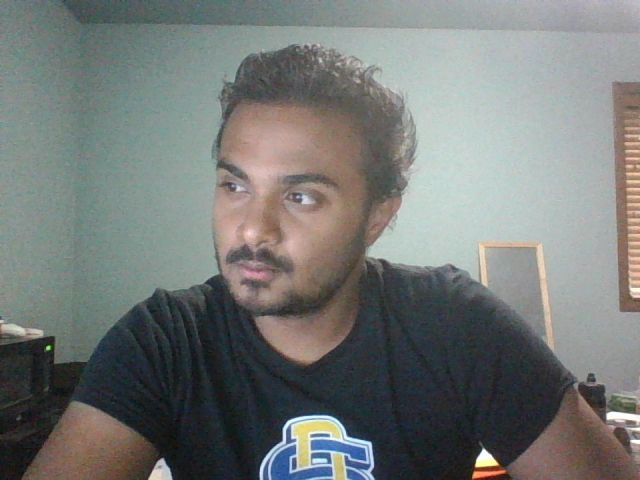

In [41]:
#Webcam from google colab
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

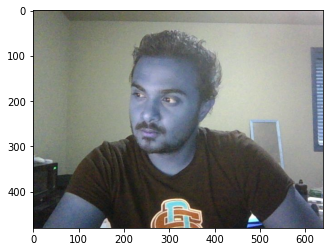

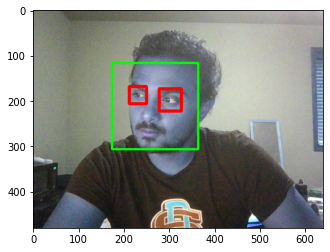

In [43]:
#Detection in Colab Webcam
WebCamImage = cv2.imread('photo.jpg')
plt.figure()
plt.imshow(WebCamImage)
DetectFacesEyes(WebCamImage)